Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 25-June-2025 

In [4]:
import navis
import flybrains
from fafbseg import flywire
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'fafbseg'

In [ ]:
# Set IDs
root_ids_1 = [720575940633362145, 720575940639781027]
root_ids_2 = [720575940618197840, 720575940625414666, 720575940626598233, # BPN1
              720575940624589287, 720575940611509485, 720575940610485458, 
              720575940651418102, 720575940605743648, 720575940622391019, 
              720575940628859751, 720575940622513524, 720575940627667450,
              720575940604102880, 720575940618111889, # BPN1 (SMP461)
              720575940611555251, 720575940628527607, 720575940616070283, # BPN2
              720575940622022071, 720575940632802785, 720575940630915791,
              720575940643446638, 720575940630460975,
              720575940628490028, 720575940630439471, 720575940615192588, # BPN3
              720575940634714804, 
              720575940603250860, 720575940630655007, 720575940617330107, # BPN4 
              720575940613107119, 720575940626797384, 720575940623225417]
root_ids_3 = []

In [2]:
flywire.get_materialization_versions(dataset="production") # 'production'

,expires_on,valid,is_merged,datastack,time_stamp,status,version,id
0,2025-05-21 04:10:00,True,False,flywire_fafb_production,2025-04-16 05:10:00,AVAILABLE,1032,1023
1,2025-05-07 04:10:00,True,False,flywire_fafb_production,2025-04-02 05:10:00,AVAILABLE,1026,1017
2,2121-11-10 07:10:00,True,False,flywire_fafb_production,2023-09-30 05:10:00,AVAILABLE,783,773
3,2121-11-10 07:10:00,True,True,flywire_fafb_production,2023-03-21 08:10:00,AVAILABLE,630,619
4,2121-11-10 07:10:00,True,True,flywire_fafb_production,2023-01-10 08:11:00,AVAILABLE,571,560
5,2121-11-10 07:10:00,True,True,flywire_fafb_production,2022-11-17 08:10:00,AVAILABLE,526,515
6,2121-02-18 08:10:00,True,True,flywire_fafb_production,2022-01-17 08:10:00,AVAILABLE,258,247


In [27]:
flywire.set_default_dataset('flywire_fafb_production')
root_id = [720575940639781027] # [720575940620260219]

Default dataset set to "flywire_fafb_production"


In [ ]:
# # Get L2 dotprops (lower resolution skeletons) 
# n = flywire.l2_dotprops(root_ids)

In [ ]:
# # Get skeletons 
# n_1 = flywire.skeletonize_neuron(root_ids_1)
# n_2 = flywire.skeletonize_neuron(root_ids_2)

In [28]:
# Get meshes (highest resolution)
#n_1 = flywire.get_mesh_neuron(root_ids_1)
#n_2 = flywire.get_mesh_neuron(root_ids_2)
n = flywire.get_mesh_neuron(root_id)

Fetching:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
# Transform meshes 
n_xform = navis.xform_brain(n, source = 'FAFB', target = 'JRC2018U')

# Save mesh
# navis.write_mesh(xform, r'C:/Users/Chris/Desktop/neuron.obj')

Transform path: FAFB = FAFB14 -> FAFB14um -> JRC2018F -> JRC2018U


In [22]:
# Get brain and neuropils 
#brain = flybrains.FLYWIRE
brain = flybrains.JRC2018U
#neuropils = flywire.get_neuropil_volumes(['ICL_L', 'ICL_R','SPS_L','SPS_R','IPS_L','IPS_R'])

In [24]:
# Set colors
color = []

# Neurons
#for i in root_ids_1:
#    color.append([0/255,0/255,255/255,1])
#    
#for i in root_ids_2:
#    color.append([0/255,255/255,0/255,1])

color.append([0/255,150/255,200/255,1])

# Brain
color.append([0.75,0.75,0.75,0.1])

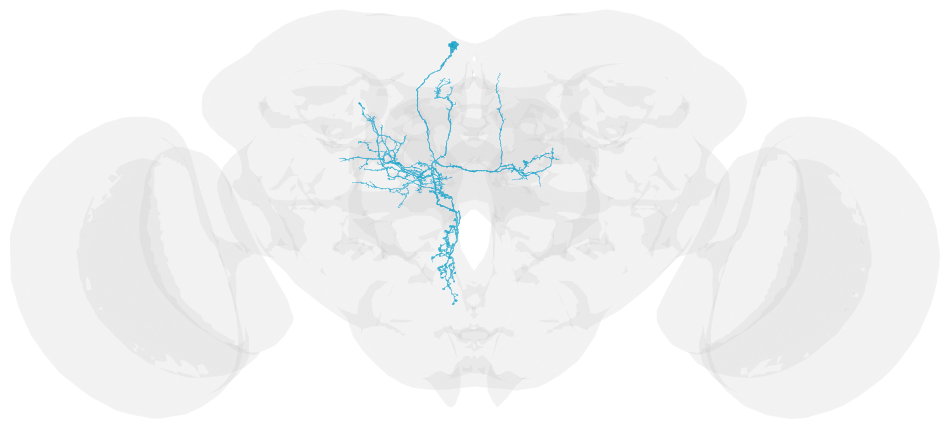

In [26]:
# Plot neurons 
fig, ax = navis.plot2d(
    [n_xform, brain.mesh], #[n, brain.mesh, neuropils] 
    dps_scale_vec=1000,    
    method='2d', 
    view=('-x','-y'), # Posterior view: ('-x','-y'); front view: ('x','-y'); dorsal view: ('-x','-z') 
    figsize=(12, 12),
    color = color, # Brain has to be last input
    )

plt.savefig(r'C:/Users/Chris/Desktop/RR_left.png', dpi=400)
plt.show()